In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import validation_curve

In [2]:
path = '../Clean Data'
X_fn = 'X.csv'
y_fn = 'y.csv'
X_path = os.path.join(path, X_fn)
y_path = os.path.join(path, y_fn)

X = pd.read_csv(X_path)
y = pd.read_csv(y_path)

In [3]:
X.head()

,Unnamed: 0,cluster_id_6,Year,nameplate_capacity,DATETIME,GROSS LOAD (MW),"ERCOT Load, MW","Total Wind Installed, MW","Total Wind Output, MW","Wind Output, % of Installed","Wind Output, % of Load",1-hr MW change,1-hr % change,Net Load (MW),Net Load Change (MW),Month,NG Price ($/mcf),All coal,Lignite,Subbituminous
0,0,0,2007,5949.0,2007-01-01 00:00:00,4596.0,30428.0,2790.0,1074.0,38.494624,3.529644,NaN,NaN,29354.0,NaN,1,6.42,25.1475,20.0275,28.115
1,1,0,2007,5949.0,2007-01-01 01:00:00,4566.0,30133.0,2790.0,922.6,33.068100,3.061760,-151.4,-14.096834,29210.4,-143.6,1,6.42,25.1475,20.0275,28.115
2,2,0,2007,5949.0,2007-01-01 02:00:00,4667.0,29941.0,2790.0,849.2,30.437276,2.836245,-73.4,-7.955777,29091.8,-118.6,1,6.42,25.1475,20.0275,28.115
3,3,0,2007,5949.0,2007-01-01 03:00:00,4668.0,29949.0,2790.0,1056.3,37.860215,3.526996,207.1,24.387659,28892.7,-199.1,1,6.42,25.1475,20.0275,28.115
4,4,0,2007,5949.0,2007-01-01 04:00:00,4685.0,30248.0,2790.0,837.1,30.003584,2.767456,-219.2,-20.751680,29410.9,518.2,1,6.42,25.1475,20.0275,28.115


In [4]:
X.tail()

,Unnamed: 0,cluster_id_6,Year,nameplate_capacity,DATETIME,GROSS LOAD (MW),"ERCOT Load, MW","Total Wind Installed, MW","Total Wind Output, MW","Wind Output, % of Installed","Wind Output, % of Load",1-hr MW change,1-hr % change,Net Load (MW),Net Load Change (MW),Month,NG Price ($/mcf),All coal,Lignite,Subbituminous
473329,473329,5,2015,11476.0,2015-12-31 19:00:00,7516.0,39908.77734,16170.0,3824.932373,23.654498,9.584188,483.971191,14.485987,36083.844967,-1172.357911,12,2.23,28.53,24.04,32.55
473330,473330,5,2015,11476.0,2015-12-31 20:00:00,6552.0,38736.85938,16170.0,4625.632813,28.606264,11.941166,800.700440,20.933715,34111.226567,-1972.618400,12,2.23,28.53,24.04,32.55
473331,473331,5,2015,11476.0,2015-12-31 21:00:00,5944.0,37587.70313,16170.0,4957.714844,30.659956,13.189725,332.082031,7.179170,32629.988286,-1481.238281,12,2.23,28.53,24.04,32.55
473332,473332,5,2015,11476.0,2015-12-31 22:00:00,5698.0,36356.26172,16170.0,4699.097656,29.060592,12.925140,-258.617188,-5.216460,31657.164064,-972.824222,12,2.23,28.53,24.04,32.55
473333,473333,5,2015,11476.0,2015-12-31 23:00:00,5365.0,35150.33984,16170.0,4313.125000,26.673624,12.270507,-385.972656,-8.213761,30837.214840,-819.949224,12,2.23,28.53,24.04,32.55


In [5]:
y.tail(n=10)

,Unnamed: 0,DATETIME,cluster_id_6,Gen Change (MW)
473324,473324,2015-12-31 14:00:00,5,-386.0
473325,473325,2015-12-31 15:00:00,5,-66.0
473326,473326,2015-12-31 16:00:00,5,280.0
473327,473327,2015-12-31 17:00:00,5,755.0
473328,473328,2015-12-31 18:00:00,5,517.0
473329,473329,2015-12-31 19:00:00,5,-20.0
473330,473330,2015-12-31 20:00:00,5,-964.0
473331,473331,2015-12-31 21:00:00,5,-608.0
473332,473332,2015-12-31 22:00:00,5,-246.0
473333,473333,2015-12-31 23:00:00,5,-333.0


In [6]:
y.drop('Unnamed: 0', axis=1, inplace=True)
y.fillna(0, inplace=True)

In [7]:
X_cols = ['nameplate_capacity', 'GROSS LOAD (MW)', 'ERCOT Load, MW',
          'Total Wind Installed, MW', 'Total Wind Output, MW', 'Net Load Change (MW)',
          'NG Price ($/mcf)', 'All coal', 'Lignite', 'Subbituminous']
X_train = X.loc[(X['Year']<2012)&(X['cluster_id_6']==0),X_cols]
y_train = y.loc[(X['Year']<2012)&(X['cluster_id_6']==0),:]

X_cv = X.loc[(X['Year'].isin([2012, 2013]))&(X['cluster_id_6']==0),X_cols]
y_cv = y.loc[(X['Year'].isin([2012, 2013]))&(X['cluster_id_6']==0),:]

X_test = X.loc[(X['Year']>=2013)&(X['cluster_id_6']==0),X_cols]
y_test = y.loc[(X['Year']>=2013)&(X['cluster_id_6']==0),'Gen Change (MW)']

In [8]:
X_cv.shape
y_cv.shape

(17544, 3)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

In [10]:
lr = LinearRegression(normalize=True)

In [11]:
lr.fit(X_train.fillna(0), y_train.loc[:,'Gen Change (MW)'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [12]:
lr.score(X_cv, y_cv.loc[:,'Gen Change (MW)'])

0.26614320622468557

In [13]:
svm = SVR()

In [14]:
parameters = {'C':np.logspace(-5, 1, num=5)}

In [15]:
lm = GridSearchCV(svm, parameters, n_jobs=-1, verbose=3)

In [16]:
X_train_scale = StandardScaler().fit_transform(X_train.fillna(0))

In [17]:
lm.fit(X_train_scale, y_train.loc[:,'Gen Change (MW)'])

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:  3.7min remaining:  5.5min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  6.6min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  6.7min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': array([  1.00000e-05,   3.16228e-04,   1.00000e-02,   3.16228e-01,
         1.00000e+01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [18]:
lm.cv_results_

{'mean_fit_time': array([ 127.08233325,  128.67766666,  123.65333327,  111.59499995,
         110.36966658]),
 'mean_score_time': array([ 26.2396667 ,  26.87733332,  25.91733336,  24.87133336,  24.34333332]),
 'mean_test_score': array([  9.42038679e-07,   2.77809258e-04,   7.75267562e-03,
          6.88423672e-02,   1.22318688e-01]),
 'mean_train_score': array([  2.20115028e-06,   5.99949654e-04,   1.66536334e-02,
          1.32001489e-01,   2.35857210e-01]),
 'param_C': masked_array(data = [1.0000000000000001e-05 0.00031622776601683794 0.01 0.31622776601683794
  10.0],
              mask = [False False False False False],
        fill_value = ?),
 'params': ({'C': 1.0000000000000001e-05},
  {'C': 0.00031622776601683794},
  {'C': 0.01},
  {'C': 0.31622776601683794},
  {'C': 10.0}),
 'rank_test_score': array([5, 4, 3, 2, 1]),
 'split0_test_score': array([  5.36187481e-06,   2.19473259e-04,   5.85238663e-03,
          4.45736826e-02,   5.65343251e-02]),
 'split0_train_score': array([  2.

In [19]:
lm.score(StandardScaler().fit_transform(X_cv), y_cv.loc[:,'Gen Change (MW)'])

0.1263347822127926

In [20]:
lsvr = LinearSVR()

In [21]:
lsvr.fit(X_train_scale, y_train.loc[:,'Gen Change (MW)'])

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [22]:
X_cv_scaled = StandardScaler().fit_transform(X_cv)

In [23]:
lsvr.score(X_cv_scaled, y_cv.loc[:,'Gen Change (MW)'])

0.19388124517716987

In [24]:
X_train = X.loc[(X['Year']<2012),X_cols+['cluster_id_6']]
X_train.fillna(0, inplace=True)
y_train = y.loc[(X['Year']<2012),:]
y_train.fillna(0, inplace=True)

C:\Users\Tim\Anaconda2\lib\site-packages\pandas\core\frame.py:2762: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [25]:
X_train.head()

,nameplate_capacity,GROSS LOAD (MW),"ERCOT Load, MW","Total Wind Installed, MW","Total Wind Output, MW",Net Load Change (MW),NG Price ($/mcf),All coal,Lignite,Subbituminous,cluster_id_6
0,5949.0,4596.0,30428.0,2790.0,1074.0,0.0,6.42,25.1475,20.0275,28.115,0
1,5949.0,4566.0,30133.0,2790.0,922.6,-143.6,6.42,25.1475,20.0275,28.115,0
2,5949.0,4667.0,29941.0,2790.0,849.2,-118.6,6.42,25.1475,20.0275,28.115,0
3,5949.0,4668.0,29949.0,2790.0,1056.3,-199.1,6.42,25.1475,20.0275,28.115,0
4,5949.0,4685.0,30248.0,2790.0,837.1,518.2,6.42,25.1475,20.0275,28.115,0


In [26]:
gbr = GradientBoostingRegressor()

In [27]:
params = {'n_estimators': [100, 200, 400],
          'max_depth': [1, 3, 5]
          }
gb_gs = GridSearchCV(gbr, params, n_jobs=-1, verbose=3)

In [28]:
gb_gs.fit(X_train, y_train.loc[:,'Gen Change (MW)'])

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  22 out of  27 | elapsed:  6.6min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  9.1min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 400], 'max_depth': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [29]:
X_cv = X.loc[(X['Year'].isin([2012, 2013])),X_cols+['cluster_id_6']]
X_cv.fillna(0, inplace=True)
y_cv = y.loc[(X['Year'].isin([2012, 2013])),:]
y_cv.fillna(0, inplace=True)

In [30]:
gb_gs.score(X_cv, y_cv.loc[:,'Gen Change (MW)'])

0.57203101611195495

#### Validation Curve

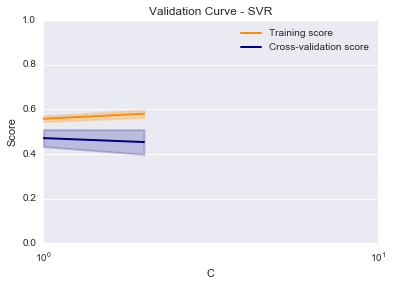

In [58]:
train_scores, valid_scores = validation_curve(GradientBoostingRegressor(), X_train, y_train.loc[:,"Gen Change (MW)"], "n_estimators", [100, 200, 400])

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.title("Validation Curve - SVR")
plt.xlabel("C")
plt.ylabel("Score")
plt.ylim(0.0, 1)
lw = 2
param_range = range(0, 3)
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [31]:
gb_gs.best_params_
gb_gs.best_index_

6

In [32]:
gbr2 = GradientBoostingRegressor(max_depth= 5, n_estimators= 100)

In [33]:
gbr2.fit(X_train, y_train.loc[:,'Gen Change (MW)'])

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [34]:
gbr2.score(X_cv, y_cv.loc[:,'Gen Change (MW)'])

0.57181825218744442

In [35]:
X_cv.tail()

,nameplate_capacity,GROSS LOAD (MW),"ERCOT Load, MW","Total Wind Installed, MW","Total Wind Output, MW",Net Load Change (MW),NG Price ($/mcf),All coal,Lignite,Subbituminous,cluster_id_6
368203,9946.0,8638.0,41092.511719,11205.5,7017.341042,-2013.098208,4.4,28.99,22.79,35.2,5
368204,9946.0,8459.0,40130.968750,11205.5,7567.017969,-1511.219896,4.4,28.99,22.79,35.2,5
368205,9946.0,8138.0,39343.050781,11205.5,7688.282375,-909.182375,4.4,28.99,22.79,35.2,5
368206,9946.0,7919.0,38115.851562,11205.5,7639.041425,-1177.958268,4.4,28.99,22.79,35.2,5
368207,9946.0,8101.0,37058.792969,11205.5,7526.410428,-944.427597,4.4,28.99,22.79,35.2,5


In [36]:
y_pr = gbr2.predict(X_cv)

In [37]:
y_resids = y_cv
y_resids.loc[:,'y_pr'] = y_pr

C:\Users\Tim\Anaconda2\lib\site-packages\pandas\core\indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Tim\Anaconda2\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [38]:
y_resids.head()

,DATETIME,cluster_id_6,Gen Change (MW),y_pr
262944,2012-01-01 00:00:00,0,0.0,-16.949028
262945,2012-01-01 01:00:00,0,1.0,17.606598
262946,2012-01-01 02:00:00,0,-1.0,16.467655
262947,2012-01-01 03:00:00,0,0.0,24.309541
262948,2012-01-01 04:00:00,0,0.0,54.238786


In [39]:
y_resids.loc[:,'residuals'] = y_resids.loc[:, 'y_pr'] - y_resids.loc[:,'Gen Change (MW)']

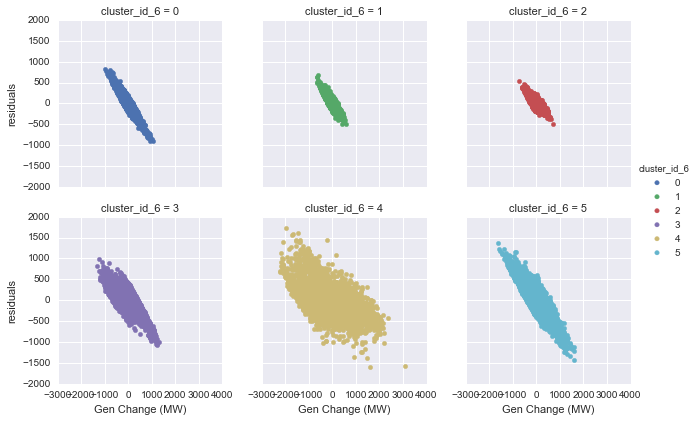

In [40]:
g = sns.FacetGrid(y_resids, hue='cluster_id_6', col='cluster_id_6',
                  col_wrap=3)
g.map(plt.scatter, 'Gen Change (MW)', 'residuals')
g.add_legend()

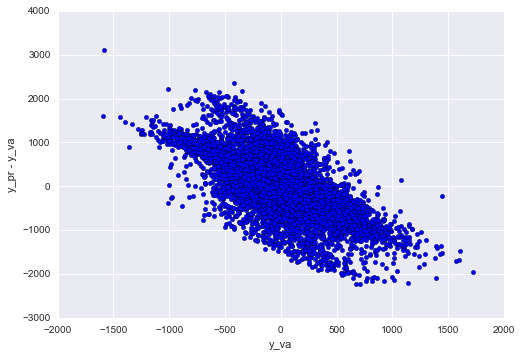

In [41]:
plt.scatter(y_pr-y_cv.loc[:,'Gen Change (MW)'], y_cv.loc[:,'Gen Change (MW)'])
plt.ylabel('y_pr - y_va')
plt.xlabel('y_va')

In [42]:
gbr2.predict(X_cv.tail())

array([-160.08752878, -137.88092438,  -76.99578375, -101.57947108,
        -68.59455465])

In [43]:
y_cv.head()
y_cv.tail()

,DATETIME,cluster_id_6,Gen Change (MW),y_pr,residuals
368203,2013-12-31 19:00:00,5,-43.0,-160.087529,-117.087529
368204,2013-12-31 20:00:00,5,-179.0,-137.880924,41.119076
368205,2013-12-31 21:00:00,5,-321.0,-76.995784,244.004216
368206,2013-12-31 22:00:00,5,-219.0,-101.579471,117.420529
368207,2013-12-31 23:00:00,5,182.0,-68.594555,-250.594555


In [44]:
zip(X_train.columns, gbr2.feature_importances_)

[('nameplate_capacity', 0.16311324248284848),
 ('GROSS LOAD (MW)', 0.2266957446011848),
 ('ERCOT Load, MW', 0.16070275154616773),
 ('Total Wind Installed, MW', 0.029568769830970634),
 ('Total Wind Output, MW', 0.038551539430330142),
 ('Net Load Change (MW)', 0.21015894748315769),
 ('NG Price ($/mcf)', 0.044721454267001144),
 ('All coal', 0.021864722102658614),
 ('Lignite', 0.01561284322072976),
 ('Subbituminous', 0.026957913095187649),
 ('cluster_id_6', 0.062052071939763469)]

In [46]:
gbr2.feature_importances_

array([ 0.16311324,  0.22669574,  0.16070275,  0.02956877,  0.03855154,
        0.21015895,  0.04472145,  0.02186472,  0.01561284,  0.02695791,
        0.06205207])

In [ ]:
zip(X_train.columns, gbr.feature_importances_)

In [ ]:
zip(X_train.columns, gb_gs.feature_importances_)

In [ ]:
gbr.get_params